In [1]:
%matplotlib inline 
import pandas as pd 

In [2]:
import os
os.chdir('C://Users//2918261//Dropbox//Corner Office Interviews')
# ('C://Users//Toshiba//Dropbox//Corner Office Interviews')
# ('C://Users//2918261//Courses//Oslo Summer School//notebooks//Interviews//Text')
os.getcwd()

'C:\\Users\\2918261\\Dropbox\\Corner Office Interviews'

In [3]:
pd.set_option('display.max_colwidth', 120)

In [ ]:
# table = pd.read_excel('C://Users//2918261//Dropbox//Corner Office Interviews//FeatureTable.xlsx')

In [ ]:
# table = pd.read_excel('FeatureTable.xlsx')

In [4]:
table = pd.read_json('C:/Users/2918261/Dropbox/Corner Office Interviews/ComparisonCorpusText/Json Tables for ML/interviews_full.json')

In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# table = table.drop(['Name ', 'Year', 'Sector_Grouped'], axis = 1)

## Logistic (Ridge by default)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
ln_classifier = LogisticRegression(penalty = 'l2', C = 5, solver = 'liblinear')

In [8]:
from textblob import TextBlob

# Use TextBlob
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase = True,
                             # token_pattern = r"(?u)\b\w+\b",
                             token_pattern = '[a-zA-Z]\w+',
                             ngram_range = (1,3),
                             stop_words = ['000'],
                             tokenizer=textblob_tokenizer,      
                             max_df    = .9,
                             min_df    = .2)

In [ ]:
## table = pd.read_excel('Complete.xlsx')

In [10]:
list(table.columns)

['filename',
 'text',
 'Name ',
 'Gender',
 'Organization',
 'Current Age',
 'NativeSpeaker',
 'Traded',
 'MBA',
 'Sector_Grouped',
 'Female',
 'Sector_Grouped_Dic',
 'Femininity',
 'Masculinity']

In [11]:
table = table.drop(['filename','Name ','Gender','Organization','Current Age','NativeSpeaker','Traded','MBA',
 'Sector_Grouped','Sector_Grouped_Dic','Femininity','Masculinity'], axis = 1)

In [12]:
train, test = train_test_split(table, test_size=0.2)

In [13]:
vectorizer.fit(train['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.2,
        ngram_range=(1, 3), preprocessor=None, stop_words=['000'],
        strip_accents=None, token_pattern='[a-zA-Z]\\w+',
        tokenizer=<function textblob_tokenizer at 0x0000020BBC0031E0>,
        vocabulary=None)

In [14]:
review_word_counts = vectorizer.transform(table['text'])

In [15]:
print(len(vectorizer.get_feature_names()))

2498


In [16]:
ln_classifier.fit(vectorizer.transform(train['text']), train['Female'])

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
print(accuracy_score(train['Female'],
                     ln_classifier.predict(vectorizer.transform(train['text']))))

1.0


In [22]:
print(accuracy_score(test['Female'],
                     ln_classifier.predict(vectorizer.transform(test['text']))))

0.7619047619047619


In [20]:
import seaborn as sns

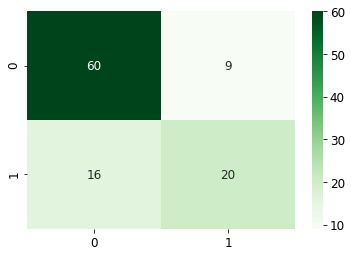

In [23]:
test_prediction = ln_classifier.predict(vectorizer.transform(test['text']))

cm = confusion_matrix(test['Female'], test_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [24]:
print(classification_report(test['Female'], test_prediction))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        69
           1       0.69      0.56      0.62        36

   micro avg       0.76      0.76      0.76       105
   macro avg       0.74      0.71      0.72       105
weighted avg       0.76      0.76      0.75       105



In [25]:
coeficients = pd.Series(ln_classifier.coef_[0],
                        index = vectorizer.get_feature_names())

In [26]:
coeficients.sort_values()[:20]

tri to      -0.271310
guy         -0.269095
real        -0.202268
use         -0.201025
leader      -0.195764
cultur      -0.186115
never       -0.185600
stuff       -0.183193
whether     -0.173244
actual      -0.173235
life        -0.170878
possibl     -0.168490
father      -0.159828
environ     -0.156313
you will    -0.147718
grow        -0.146063
have got    -0.144389
no          -0.144020
trust       -0.138866
peopl can   -0.135383
dtype: float64

In [27]:
coeficients.sort_values(ascending = False)[:20]

women        0.406101
love         0.296603
know what    0.251419
she          0.251278
wa veri      0.193543
i had        0.191894
like to      0.186362
feel         0.185785
train        0.185333
famili       0.184652
situat       0.179979
i know       0.175647
new          0.174507
model        0.170350
had to       0.169338
they were    0.168841
brand        0.168093
both         0.166501
i love       0.160143
ceo          0.159914
dtype: float64

In [28]:
import mglearn

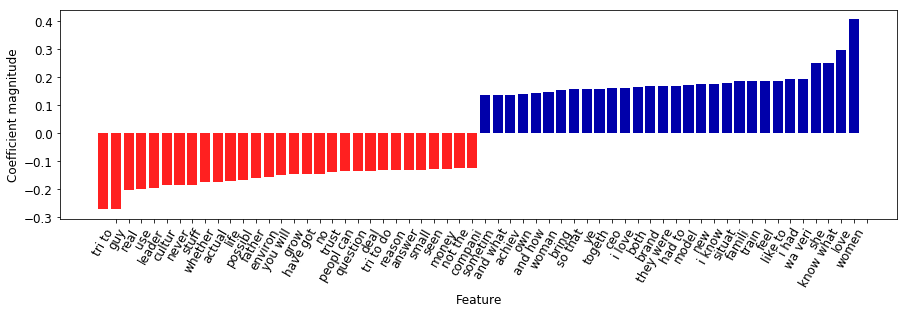

In [29]:
mglearn.tools.visualize_coefficients(ln_classifier.coef_[0], vectorizer.get_feature_names(), n_top_features=30)

## Logistic Lasso

In [30]:
logreg=LogisticRegressionCV(Cs=20,cv=5,penalty='l1',solver='liblinear',refit=True).fit(vectorizer.transform(train['text']), train['Female'])

In [31]:
print(accuracy_score(train['Female'],
                     logreg.predict(vectorizer.transform(train['text']))))

1.0


In [32]:
print(accuracy_score(test['Female'],
                     logreg.predict(vectorizer.transform(test['text']))))

0.7428571428571429


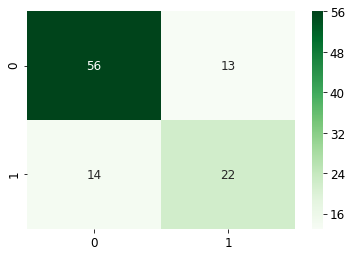

In [33]:
test_prediction = logreg.predict(vectorizer.transform(test['text']))

cm = confusion_matrix(test['Female'], test_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [34]:
print(classification_report(test['Female'], test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        69
           1       0.63      0.61      0.62        36

   micro avg       0.74      0.74      0.74       105
   macro avg       0.71      0.71      0.71       105
weighted avg       0.74      0.74      0.74       105



In [35]:
coeficients = pd.Series(logreg.coef_[0],
                        index = vectorizer.get_feature_names())

In [36]:
coeficients.sort_values()[:20]

tri to do    -1.302987
peopl can    -1.097728
stage        -0.637973
father       -0.531905
possibl      -0.530004
100          -0.497532
the cultur   -0.443140
environ      -0.433151
want to do   -0.429693
seen         -0.425943
stuff        -0.414422
you look     -0.413238
guy          -0.403449
busi is      -0.396973
up and       -0.392408
you will     -0.392207
for what     -0.386570
deal         -0.380423
real         -0.363349
spend        -0.361318
dtype: float64

In [37]:
coeficients.sort_values(ascending = False)[:20]

alway been       0.940490
wa veri          0.882146
someon who       0.880301
wa to            0.734201
balanc           0.687193
i know           0.652808
women            0.633606
know what        0.627863
to ask           0.608894
to my            0.601692
both             0.550581
i love           0.508911
woman            0.495671
ye               0.482165
to put           0.466396
realli import    0.455159
they had         0.437459
less             0.425445
as well as       0.416062
not alway        0.413690
dtype: float64

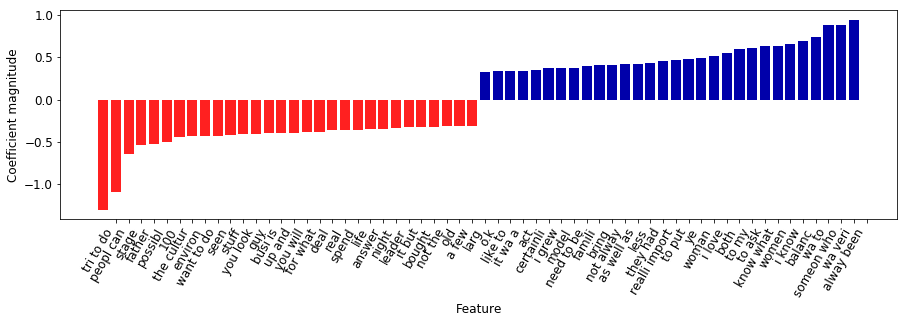

In [38]:
mglearn.tools.visualize_coefficients(logreg.coef_[0], vectorizer.get_feature_names(), n_top_features=30)

## Logistic Ridge 

In [39]:
model_ridge=LogisticRegressionCV(Cs=20,cv=5,penalty='l2',solver='liblinear',refit=True).fit(vectorizer.transform(train['text']), train['Female'])

In [40]:
print(accuracy_score(train['Female'],
                     model_ridge.predict(vectorizer.transform(train['text']))))

1.0


In [41]:
print(accuracy_score(test['Female'],
                     model_ridge.predict(vectorizer.transform(test['text']))))

0.7904761904761904


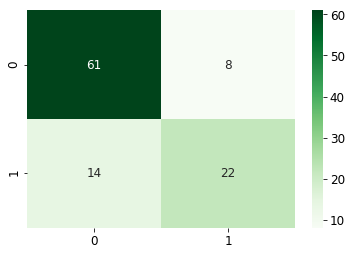

In [42]:
test_prediction = model_ridge.predict(vectorizer.transform(test['text']))

cm = confusion_matrix(test['Female'], test_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [43]:
print(classification_report(test['Female'], test_prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        69
           1       0.73      0.61      0.67        36

   micro avg       0.79      0.79      0.79       105
   macro avg       0.77      0.75      0.76       105
weighted avg       0.79      0.79      0.79       105



In [44]:
coeficients_ridge = pd.Series(model_ridge.coef_[0],
                        index = vectorizer.get_feature_names())

In [45]:
coeficients_ridge.sort_values()[:20]

tri to     -0.072417
guy        -0.063984
use        -0.048491
cultur     -0.045032
have got   -0.044950
real       -0.043355
stuff      -0.042698
never      -0.042289
compani    -0.042086
question   -0.040316
life       -0.040009
actual     -0.039378
leader     -0.037655
trust      -0.036937
possibl    -0.035512
you will   -0.035426
whether    -0.034328
three      -0.034181
got to     -0.034091
no         -0.033998
dtype: float64

In [46]:
coeficients_ridge.sort_values(ascending = False)[:20]

women        0.118386
love         0.070519
she          0.065491
feel         0.057030
i had        0.053340
know what    0.048798
famili       0.046520
like to      0.043434
brand        0.042018
woman        0.040246
train        0.040155
had to       0.039669
model        0.038891
wa veri      0.038645
ceo          0.037289
i love       0.036788
i know       0.036784
young        0.036776
new          0.035925
opportun     0.035773
dtype: float64

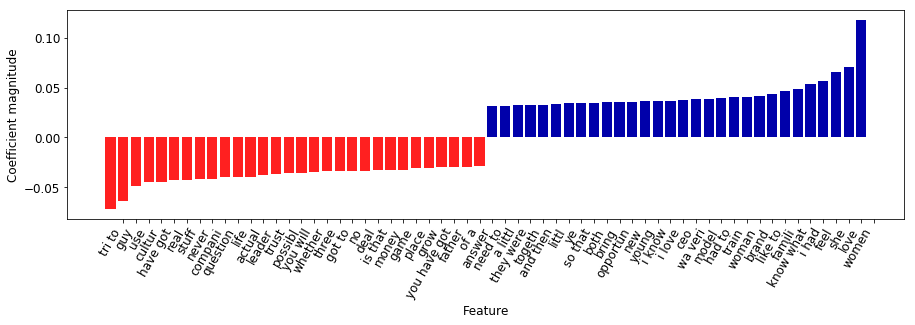

In [47]:
mglearn.tools.visualize_coefficients(model_ridge.coef_[0], vectorizer.get_feature_names(), n_top_features=30)

## Elastic Net

In [48]:
import numpy as np
from sklearn import linear_model

In [69]:
net = linear_model.SGDClassifier(loss = 'log', penalty='elasticnet', max_iter=1000, tol=1e-3).fit(vectorizer.transform(train['text']), train['Female'])

In [70]:
print(accuracy_score(train['Female'],
                     net.predict(vectorizer.transform(train['text']))))

1.0


In [71]:
print(accuracy_score(test['Female'],
                     net.predict(vectorizer.transform(test['text']))))

0.7523809523809524


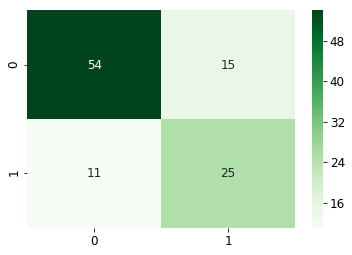

In [72]:
test_prediction = net.predict(vectorizer.transform(test['text']))

cm = confusion_matrix(test['Female'], test_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [73]:
print(classification_report(test['Female'], test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        69
           1       0.62      0.69      0.66        36

   micro avg       0.75      0.75      0.75       105
   macro avg       0.73      0.74      0.73       105
weighted avg       0.76      0.75      0.76       105



In [74]:
coeficients_net = pd.Series(net.coef_[0],
                        index = vectorizer.get_feature_names())

In [75]:
coeficients_net.sort_values()[:20]

tri to     -237.668351
guy        -226.846604
stuff      -193.311524
and so     -186.163683
place      -165.830159
i want     -165.692665
cultur     -152.546024
life       -149.999862
again      -147.933244
build      -147.039992
world      -144.841323
game       -142.070553
we were    -141.961815
here       -141.691841
grow       -141.251657
have got   -140.448433
manag      -138.355465
that we    -135.908239
no         -135.505966
will be    -132.154640
dtype: float64

In [76]:
coeficients_net.sort_values(ascending = False)[:20]

women         315.194716
love          206.959009
she           196.712615
ye            189.347699
oh            185.818486
feel          183.994580
woman         169.119307
brand         162.610706
they were     160.178242
for me        157.226694
like to       156.141330
so it         153.677376
wa veri       153.156690
that wa       151.405552
about what    148.430673
data          141.525233
i had         141.186828
qualiti       140.043840
togeth        139.796735
so that       139.320893
dtype: float64

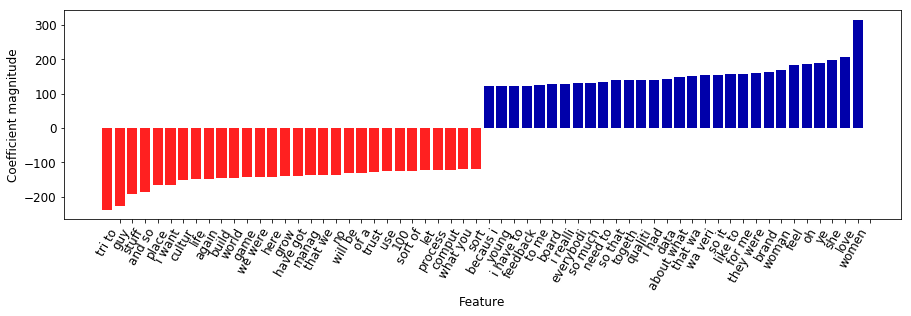

In [77]:
mglearn.tools.visualize_coefficients(net.coef_[0], vectorizer.get_feature_names(), n_top_features=30)

## Random Forest

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
forest = RandomForestClassifier().fit(vectorizer.transform(train['text']), train['Female'])

C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
print(accuracy_score(train['Female'],
                     forest.predict(vectorizer.transform(train['text']))))

0.9760191846522782


In [68]:
print(accuracy_score(test['Female'],
                     forest.predict(vectorizer.transform(test['text']))))

0.6571428571428571


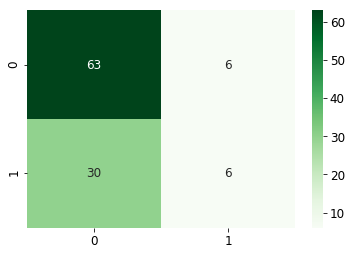

In [63]:
test_prediction = forest.predict(vectorizer.transform(test['text']))

cm = confusion_matrix(test['Female'], test_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [64]:
print(classification_report(test['Female'], test_prediction))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78        69
           1       0.50      0.17      0.25        36

   micro avg       0.66      0.66      0.66       105
   macro avg       0.59      0.54      0.51       105
weighted avg       0.62      0.66      0.60       105



In [65]:
coeficients_forest = pd.Series(forest.feature_importances_[0],
                        index = vectorizer.get_feature_names())

In [66]:
coeficients_forest.sort_values()[:20]

1             0.0
seven         0.0
sever         0.0
share         0.0
she           0.0
she is        0.0
she wa        0.0
shift         0.0
short         0.0
should        0.0
should be     0.0
should not    0.0
show          0.0
side          0.0
side of       0.0
sign          0.0
set of        0.0
set           0.0
servic        0.0
serv          0.0
dtype: float64

In [67]:
coeficients_forest.head()

1          0.0
10         0.0
10 year    0.0
100        0.0
12         0.0
dtype: float64